In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create dataframe from local csv file
stroke_data_original =pd.read_csv('../Data/train_2v.csv')

# We will start by preview our data and determing what kind of problem we have. 

In [4]:
# Preview dataframe
stroke_data_original.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
# Get shape of dataframe
stroke_data_original.shape

(43400, 12)

In [6]:
# Get the number of indiviudals who had a stroke.
number_of_people_who_had_a_stroke = len(stroke_data_original[stroke_data_original["stroke"] == 1])
number_of_people_who_had_a_stroke

783

In [8]:
# Get the percentage of people who had a stroke
percentage_of_people_who_had_a_stroke = (number_of_people_who_had_a_stroke / len(stroke_data_original) ) * 100
percentage_of_people_who_had_a_stroke

1.804147465437788

 # After previewing our data, we see that we have a classification problem.  We will determine what the most appropriate features are, and use these to predict whether an individual will have a stroke.
 
 # We also notice that only about 1.8% of the individuals in our dataset had a stroke.  We will have to find a way to deal with imbalanced data.

# 1. Prework / Data Cleansing

In [9]:
# We do not want to work with unique identifiers.
# We will therefore drop the id column.

stroke_data_clean = stroke_data_original.drop(["id"], axis=1)
stroke_data_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [10]:
# Check for NaN values
stroke_data_clean.isna().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [11]:
# Get number of unique values in smoking_status column
stroke_data_clean["smoking_status"].nunique()

3

In [12]:
stroke_data_clean.groupby("smoking_status").count()["stroke"]

smoking_status
formerly smoked     7493
never smoked       16053
smokes              6562
Name: stroke, dtype: int64

In [13]:
# Get number of unique values in bmi column
stroke_data_clean["bmi"].nunique()

555

### We are working with NaN data.  We have a few options for what to do.

### Concerning the bmi values, we could:

1. Fill NaN values with the mean bmi value
1. Fill NaN values with the median bmi value
1. Fill NaN values with the mode bmi value

In [15]:
print(f"Mean: {stroke_data_clean['bmi'].mean()},\n\
Median: {stroke_data_clean['bmi'].mean()},\n\
Mode: {stroke_data_clean.mode()['bmi'][0]}")

Mean: 28.605038390004545,
Median: 28.605038390004545,
Mode: 27.7


In [17]:
# Fill NaN values in the "bmi" column with the mean bmi.
stroke_data_clean["bmi"].fillna(stroke_data_clean["bmi"].mean(), inplace=True)

In [18]:
# Confirm no NaN values in the "bmi" column
stroke_data_clean.isna().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

### Concerning the smoking_status values, we could:

1. Assume these individuals were ashamed they smoke, and skipped this question.  We would therefore fill these values with "smokes"
2. Assume these individuals have never smoked and didn't think the question was important, and skipped it.  We would therefore fill these values with "never_smoked."

In [19]:
# Define two new dataframes based on the cleaned_stroke_data dataframe
stroke_data_clean_assume_smokes = stroke_data_clean_assume_never_smoked = stroke_data_clean

# Fill NaN values in the "smoking_status" column with either "smoked" or "never_smoked,"
# based on our aforementioned assumptions.
stroke_data_clean_assume_smokes.fillna("smokes", inplace=True)
stroke_data_clean_assume_never_smoked.fillna("never_smoked", inplace=True)

# cleaned_stroke_data_assume_smokes = cleaned_stroke_data["smoking_status"].fillna(value="smokes", inplace=True)
# cleaned_stroke_data_assume_never_smoked = cleaned_stroke_data["smoking_status"].fillna(value="never_smoked", inplace=True)

In [21]:
# Confirm no NaN values after filling in NaN data.
print(stroke_data_clean_assume_smokes.isna().sum())
print()
print(stroke_data_clean_assume_never_smoked.isna().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [26]:
# Confirm we filled smoking_status with correct values
# There should be 3 unique values in the smoking_status column
print(stroke_data_clean_assume_smokes["smoking_status"].nunique())
print(stroke_data_clean_assume_never_smoked["smoking_status"].nunique())

3
3


### We will now examine the categorical data in this dataset.

In [28]:
# Get the data type for each column
print("Assume smokes")
print(stroke_data_clean_assume_smokes.dtypes)
print()
print("Assume never_smoked")
print(stroke_data_clean_assume_never_smoked.dtypes)

Assume smokes
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Assume never_smoked
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [30]:
# Get a count of how many values make up each category in the "gender" column
stroke_data_clean.groupby("gender").count()["stroke"]

gender
Female    25665
Male      17724
Other        11
Name: stroke, dtype: int64

In [32]:
# Get the stroke status for individiuals in the "other" category of the "gender" column
stroke_data[stroke_data["gender"] == "Other"]["stroke"]

NameError: name 'stroke_data' is not defined

In [33]:
percent_of_people_with_gender_other = (len(stroke_data[stroke_data["gender"] == "Other"]) / len(stroke_data)) * 100
percent_of_people_with_gender_other

NameError: name 'stroke_data' is not defined

We have 9 indiviudals whose value for "gender" is "other."  Every one of these individuals have a value of 0 for "stroke."  We opt to drop these 9 values, as it could confuse the Machine Learning model into believing that a gender of "other" will cause a value of 0 for "stroke."  These 9 rows make up about 0.03% of the dataset.

In [34]:
# Get a count of how many values make up each category in the "ever_married" column
stroke_data.groupby("ever_married").count()["stroke"]

NameError: name 'stroke_data' is not defined

In [ ]:
# Get a count of how many values make up each category in the "work_type" column
stroke_data.groupby("work_type").count()["stroke"]

In [ ]:
# Get a count of how many values make up each category in the "Residence_type" column
stroke_data.groupby("Residence_type").count()["stroke"]

In [ ]:
# Get a count of how many values make up each category in the "smoking_status" column
stroke_data.groupby("smoking_status").count()["stroke"]

## 2. Data Exploration

Text(0.5,1.05,'Count of indiviudals who had a stroke\n1 corresponds to "had a stroke"')

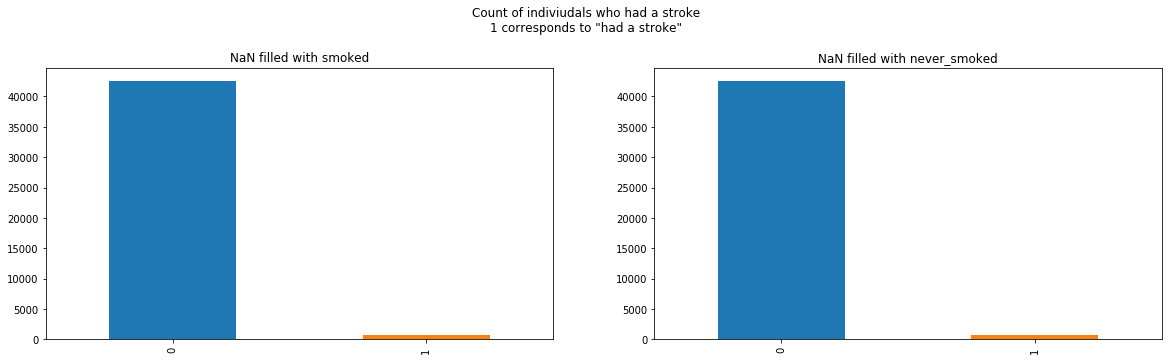

In [112]:
# Make a bar plot to see count of how many people did and did not have a stroke
plt.subplots(figsize=(20,5))

plt.subplot(1,2,1)
stroke_data_clean_assume_smokes.stroke.value_counts().plot(kind="bar")
plt.title("NaN filled with smoked")

plt.subplot(1,2,2)
stroke_data_clean_assume_never_smoked.stroke.value_counts().plot(kind="bar")
plt.title("NaN filled with never_smoked")

plt.suptitle("Count of indiviudals who had a stroke\n1 corresponds to \"had a stroke\"", x=0.5, y=1.05)

In [48]:
# Create list of possible categorical features
possible_categorical_features = ["gender",
                                 "hypertension",
                                 "heart_disease",
                                 "ever_married",
                                 "work_type",
                                 "Residence_type",
                                 "smoking_status"]

# Create list of possible numerical features
possible_numerical_features = ["age",
                               "avg_glucose_level",
                               "bmi"]

### Categorical Analysis

C:\Users\tyler\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\tyler\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\tyler\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py

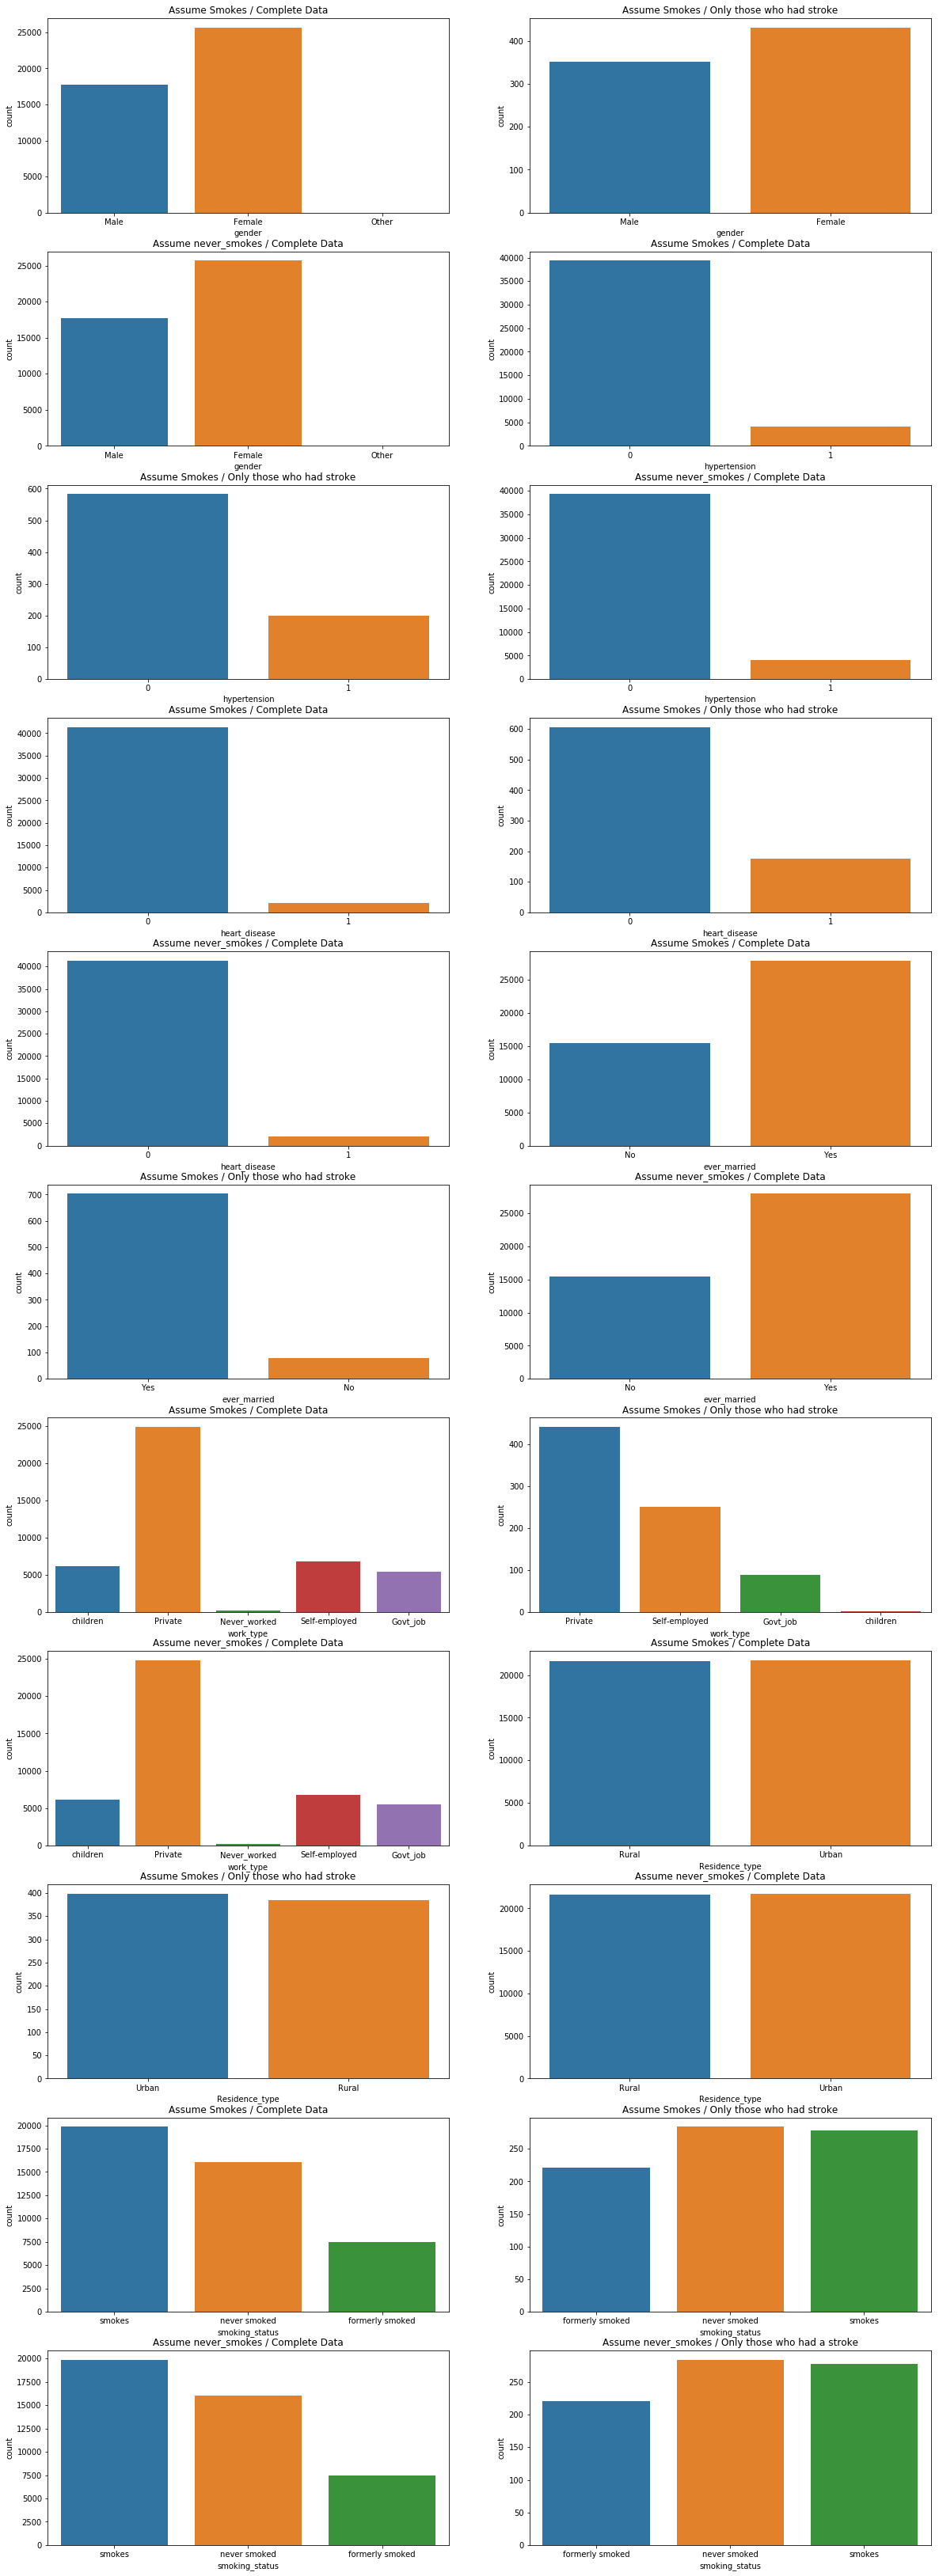

In [70]:
# Define a subplot so we can see each plot after data-cleansing compared to the original dataset
plt.subplots(figsize=(20,75))

# Define an iterator to place each sublplot in the right place
i = 1

# Define dataframes of filtered data
stroke_data_clean_assume_smokes_stroke_true = stroke_data_clean_assume_smokes[stroke_data_clean_assume_smokes["stroke"] == 1]
stroke_data_clean_assume_never_smoked_stroke_true = stroke_data_clean_assume_never_smoked[stroke_data_clean_assume_never_smoked["stroke"] == 1]

for possible_feature in possible_categorical_features:
    
    plt.subplot(14,2,i)
    sns.countplot(possible_feature, data=stroke_data_clean_assume_smokes)
    plt.title("Assume Smokes / Complete Data")
    
    plt.subplot(14,2,i+1)
    sns.countplot(possible_feature, data=stroke_data_clean_assume_smokes_stroke_true)
    plt.title("Assume Smokes / Only those who had stroke")
    
    plt.subplot(14,2,i+2)
    sns.countplot(possible_feature, data=stroke_data_clean_assume_never_smoked)
    plt.title("Assume never_smokes / Complete Data")
    
    plt.subplot(14,2,i+3)
    sns.countplot(possible_feature, data=stroke_data_clean_assume_never_smoked_stroke_true)
    plt.title("Assume never_smokes / Only those who had a stroke")
    
    # This plot is comprised of 3 rows and two columns.
    # When placing each subplot we must specify it's position on the full plot.
    # We place each subplot with the syntax ("row", "column", "position").
    # The first subplot (position 1) falls in the first column of the first row.
    # The next subplot (position 2) falls in the next column of the first row.
    # The next subplot (position 3) falls in the first column of the second row.
    # This pattern continues.
    # We have two columnns,
    # so the graph showing the data after data-cleansing will be in the first column (odd-numberd position),
    # and the graph showing the data from the original dataset will be in the second column (even-numbered position).
    # We then place graphs after data-cleansing with the syntax (2, 3, i),
    # and we place graphs showing original data with the syntax (2, 3, i+1).
    # We therefore increment our iterator by 2 to preserve its parity.
    i += 3

In [64]:
# for possible_feature in possible_categorical_features:
#     sns.countplot(possible_feature, data=stroke_data_clean[stroke_data_clean["stroke"] == 1])
#     plt.title(f"Feature: {possible_feature}")
#     plt.show()

#### We already know that very few individuals are in the "had a stroke" category.  From the bar plots above, we also notice that

1. Very few individuals fall in the "has hypertension" category
2. Very few individuals fall in the "has heart disease" category
3. Relatively few individuals fall in the "not ever married" category

#### In addition to this, we notice that,
1. Individuals whose work type is "children", "government job," or "self-employed" make up varying degrees of small categories.
2. While there are fewer individuals in the "formerly smoked" and "smokes" categories than those in the "never smoked" category, the first two aforementioned categories are not as drastically small as the small categories already mentioned.
3. The "urban residence type" and "rural residence type" categories are approximately the same size.

### Numerical Analysis

In [ ]:
# Get kdeplot for each possible numerical feature
for possible_feature in possible_numerical_features:
    sns.kdeplot(stroke_data[possible_feature])
    plt.title(f"Feature: {possible_feature}\nMode: {round(stroke_data.mode()[possible_feature][0], 2)}")
    plt.show()

#### From the KDE plots above, we notice that,

1. Most samples appear to have an age in the 50s.
2. Most samples have an average glucose level (AVG) a little less than 100, perhaps around 80-90.  The frequency of AVGs drop sharply after this value, though there is a slight spike in frequency for individuals with an average glucose level just over 200.
3. Most samples have an average bmi somewhere around 30.

In [ ]:
for possible_feature in possible_numerical_features:
    sns.regplot(x=possible_feature, y="stroke", data=stroke_data, fit_reg=False, y_jitter=0.1)
    plt.title(f"Individuals who had a stroke based on {possible_feature}")
    
    # Find the minimum and maximum values from the current column
    # in order to calculate the range
    # Divide this range by a small number to set a new step-size for the x-axis
    column_max = stroke_data[possible_feature].max()
    column_min = stroke_data[possible_feature].min()
    column_range = column_max - column_min
    
    # Divide the column range by 10 for the plot showing avg_glucose_level,
    # otherwise the step-size would be too low and the x-axis would be unreadable.
    # We still want to divide the range by 5 to find the step-size for the other graphs,
    # as more x-ticks help us to more clearly see where the data lies.
    if possible_feature == "avg_glucose_level":
        plt.locator_params(nbins=column_range/10)
    else: 
        plt.locator_params(nbins=column_range/5)
    
    plt.grid()
    plt.show()

#### From the regplots above, we notice that indivuals who did not have a stroke could be any age, and have any average glucose level (AVG) or BMI.  However,

1. Individuals who did have a stroke were heavily concentrated in the higher age-group.  Very few indivduals under the age of 40 had a stroke, and the "concentration" really starts breaking up below age 50.
2. Individuals who did have a stroke are heavily concentrated at an AVG of less than about 120, or an AVG of greater than about 180 .  There seems to be a gap where much fewer indivduals with an AVG between these two values had a stroke.
3. Individudals who did have a stroke are heavily concentrated between a BMI of about 20 and 40, with a decent but smaller amount of people having BMIs exceeding 40.  Very few individuals with a BMI less than 20 had a stroke.

##### The strange gap of values for average glucose levels between about 120 and 180 concerns us.  We will breifly take a look at how these graphs would look, had we not dropped any data from the dataset.

In [ ]:
# Create dataframe from local csv file
original_stroke_data =pd.read_csv('../Data/train_2v.csv')

In [ ]:
# Get shape of dataframe
original_stroke_data.shape

In [ ]:
# Check for NaN values
original_stroke_data.isna().sum()

In [ ]:
del original_stroke_data["id"]
original_stroke_data.head()

### Categorical Analysis

In [ ]:
# Define a subplot so we can see each plot after data-cleansing compared to the original dataset
plt.subplots(figsize=(30,40))

# Define an iterator to place each sublplot in the right place
i = 1

for possible_feature in possible_categorical_features:
    
    plt.subplot(7,2,i)
    sns.countplot(possible_feature, data=stroke_data)
    plt.title("After data-cleansing")
    
    plt.subplot(7,2,i+1)
    sns.countplot(possible_feature, data=original_stroke_data)
    plt.title("Original")
    
    # This plot is comprised of 3 rows and two columns.
    # When placing each subplot we must specify it's position on the full plot.
    # We place each subplot with the syntax ("row", "column", "position").
    # The first subplot (position 1) falls in the first column of the first row.
    # The next subplot (position 2) falls in the next column of the first row.
    # The next subplot (position 3) falls in the first column of the second row.
    # This pattern continues.
    # We have two columnns,
    # so the graph showing the data after data-cleansing will be in the first column (odd-numberd position),
    # and the graph showing the data from the original dataset will be in the second column (even-numbered position).
    # We then place graphs after data-cleansing with the syntax (2, 3, i),
    # and we place graphs showing original data with the syntax (2, 3, i+1).
    # We therefore increment our iterator by 2 to preserve its parity.
    i += 2

##### We can safely assume that dropping NaN data did not have a drastic effect on categorical data.

### Numerical Analysis

In [ ]:
# Define a subplot so we can see each plot after data-cleansing compared to the original dataset
plt.subplots(figsize=(20,25))

# Define an iterator to place each sublplot in the right place
i = 1

for possible_feature in possible_numerical_features:
    
    plt.subplot(3,2,i)
    sns.regplot(x=possible_feature, y="stroke", data=stroke_data, fit_reg=False, y_jitter=0.1)
    plt.title("After data-cleansing")
    plt.grid()
    
    plt.subplot(3, 2, i+1)
    sns.regplot(x=possible_feature, y="stroke", data=original_stroke_data, fit_reg=False, y_jitter=0.1)
    plt.title("Original")
    plt.grid()
    
    # Find the minimum and maximum values from the current column
    # in order to calculate the range
    # Divide this range by a small number to set a new step-size for the x-axis
    column_max = stroke_data[possible_feature].max()
    column_min = stroke_data[possible_feature].min()
    column_range = column_max - column_min
    
    # Divide the column range by 10 for the plot showing avg_glucose_level,
    # otherwise the step-size would be too low and the x-axis would be unreadable.
    # We still want to divide the range by 5 to find the step-size for the other graphs,
    # as more x-ticks help us to more clearly see where the data lies.
    if possible_feature == "avg_glucose_level":
        plt.locator_params(nbins=column_range/10)
    else: 
        plt.locator_params(nbins=column_range/5)
    
#     plt.grid()
#     plt.show()
    
    # This plot is comprised of 3 rows and two columns.
    # When placing each subplot we must specify it's position on the full plot.
    # We place each subplot with the syntax ("row", "column", "position").
    # The first subplot (position 1) falls in the first column of the first row.
    # The next subplot (position 2) falls in the next column of the first row.
    # The next subplot (position 3) falls in the first column of the second row.
    # This pattern continues.
    # We have two columnns,
    # so the graph showing the data after data-cleansing will be in the first column (odd-numberd position),
    # and the graph showing the data from the original dataset will be in the second column (even-numbered position).
    # We then place graphs after data-cleansing with the syntax (2, 3, i),
    # and we place graphs showing original data with the syntax (2, 3, i+1).
    # We therefore increment our iterator by 2 to preserve its parity.
    i += 2

##### We can safely assume that dropping NaN data did not have a drastic effect on numerical data.  The main thing we were looking for is whether dropping the data caused the strange gap between average glucose levels of 120 and 180.  This gap is also present in the original data.

### Further data analysis

In [ ]:
for possible_feature in possible_categorical_features:
    sns.violinplot(x=possible_feature, y="stroke", data=stroke_data, hue="gender")
    plt.show()

##### As we are working with highly imbalanced data, violin plots turn out to be pretty useless.

## 3. Model Building

In [ ]:
# Transform data to binary encoded data
stroke_data_binary_encoded = pd.get_dummies(stroke_data, columns=["gender", "ever_married", "work_type", "Residence_type", "smoking_status"])
stroke_data_binary_encoded.head()

In [ ]:
# Create our features and label
X = stroke_data_binary_encoded.drop(["stroke"], axis=1)
y = stroke_data_binary_encoded["stroke"].values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create scale for features and label
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Scale features and labels
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)